Internet Resources:

[Python Programming.net - machine learning episodes 34-38](https://pythonprogramming.net/machine-learning-clustering-introduction-machine-learning-tutorial/)

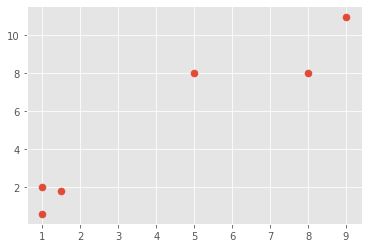

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

colors = 10*["g","r","c","b","k"]

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

Objective: Find K different Means



 Training Algorithm: 

	1. Pick K random points (=initial K means)
	
	2. For every data-point:
		a. Take distance to each current Mean
		b. Nearest Mean is the data-points classification
		
	3. For every Mean:
		a. Sum up all data-points  classified as belonging to the mean
		b.  new mean = mean of all these data points
		
	4. Repeat steps 2 & 3 for fixed amount of iterations or until optimization threshold is reached
<br>    

Prediction  Function:  
	1. Take distance of data-point to all k Means  
    2. Data-point is assigned class of the nearest mean

453.3333333333334
102.72108843537411


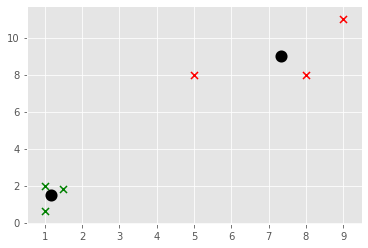

In [4]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
        
    def fit(self,data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        for i in range(self.max_iter):
            
            self.classifications = {} 
            for i in range(self.k):
                self.classifications[i] = []
                
            for featureset in data:
                # take distance of datapoint to the centroids 
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                # classification of datapoint is the nearest centroid
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                 self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
            
            if optimized:
                break
    
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=5)
        
plt.show()